In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from dateutil import relativedelta
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt

import yfinance as yf

### Settings

In [2]:
currency = 'ETH'
investing_from = '2020-01-01'
day_of_investment = 1
total_investment = 10000

#Calculate how many months we are investing
start = datetime.strptime(investing_from, '%Y-%m-%d')
today = date.today()
r = relativedelta.relativedelta(today, start)
investing_months = (r.years * 12 + r.months)

#calculate monthly investment
invest = total_investment / investing_months

### Investing same amount every month

[*********************100%***********************]  1 of 1 completed


/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/749874332.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[peak], df['ROI'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/749874332.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[valley], df['ROI'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')


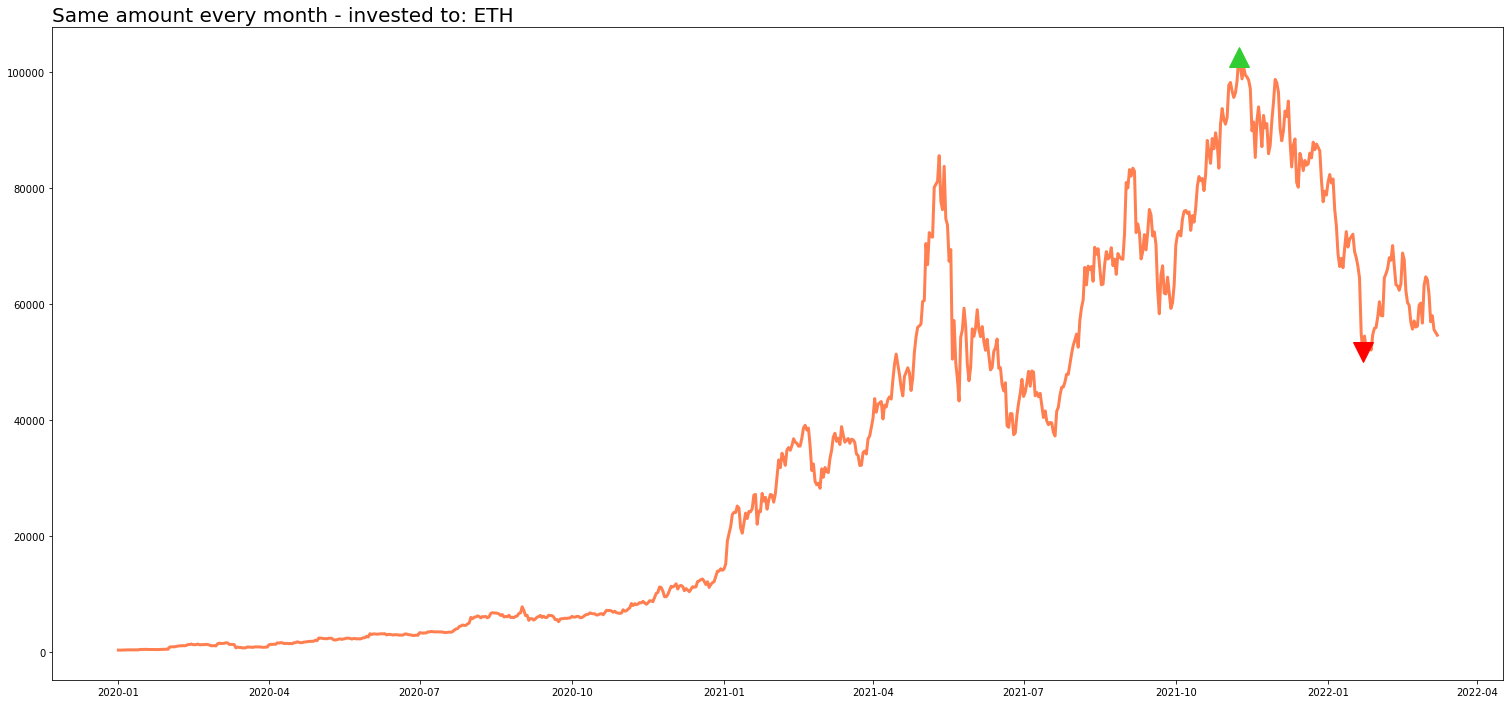

Invested: 10000 €
Value at the end: 54678 €
Return on Investment(ROI): 446.78 %
Maximum Drawdown: 49.58 %


In [3]:
df = yf.download(tickers=currency + '-USD')
df = df[df.index.year >= int(investing_from[:4])]

number_of_investment = 0
#Create new column every month
for i in range(len(df)):
    if df.index.day[i] == day_of_investment:
        df[number_of_investment] = np.NaN #create new column with nan values
        df[number_of_investment][i] = invest / df['Close'][i] #then on the day that we set, add how many coins we buy
        
        number_of_investment += 1
        
#Drop columns that we don't need
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close'])

for col in list(df.columns[1:]):
    df[col] = df[col].ffill() #fill the same value in every row below
    df[col] = df['Close'] * df[col] #multiply Closing price with amount of coins we have to get value of investment
    
#Return on Investment is calculate as sum of all columns (except for Close)
df['ROI'] = df.iloc[:, 1:].sum(axis = 1)
#Calculate Maximum Drawdown
valley = np.argmax(np.maximum.accumulate(df['ROI']) - df['ROI'])
peak = np.argmax(df['ROI'][:valley])

plt.figure(figsize = (26, 12))
plt.plot(df['ROI'], lw = 3, color = 'coral')
#Show Peak of Max DD
plt.plot(df.index[peak], df['ROI'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
#Show Bottom of Max DD
plt.plot(df.index[valley], df['ROI'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')
plt.title('Same amount every month - invested to: ' + str(currency), loc = 'left', size = 20)
plt.show()

print('Invested:', total_investment, '€')
print('Value at the end:', round(df['ROI'][-1]), '€')
print('Return on Investment(ROI):', round((df['ROI'][-1] - total_investment) / total_investment * 100, 2), '%')
print('Maximum Drawdown:', round(((df['ROI'][peak] - df['ROI'][valley]) / df['ROI'][peak])*100, 2), '%')

#Assign results to variable so we can compare different approaches later
strategy1 = df['ROI']

### All in on day 1

[*********************100%***********************]  1 of 1 completed


/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3083234254.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[peak], df['ROI'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3083234254.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[valley], df['ROI'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')


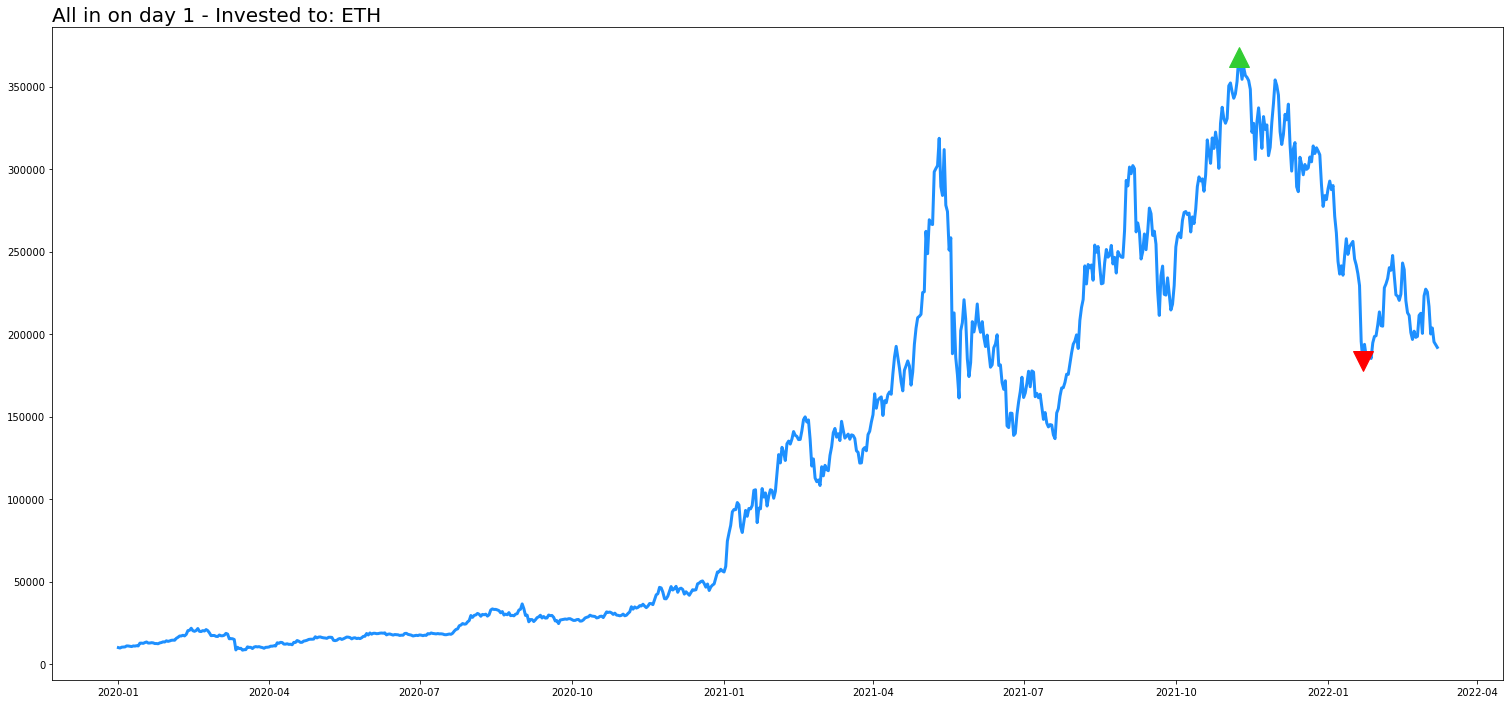

Invested: 10000 €
Value at the end: 191953 €
Return on Investment(ROI): 1819.53 %
Maximum Drawdown: 50.02 %


In [4]:
df = yf.download(tickers=currency + '-USD')
df = df[df.index.year >= int(investing_from[:4])]

#Create new column where we divide money we want to invest with price on first day
df['ROI'] = total_investment / df['Close'][0] #shows how many coins we can afford on day 1
#Then for every row we multiply current Price with amount of coins we have
df['ROI'] = df['Close'] * df['ROI']

#Calculate Maximum Drawdown
valley = np.argmax(np.maximum.accumulate(df['ROI']) - df['ROI'])
peak = np.argmax(df['ROI'][:valley])

plt.figure(figsize = (26, 12))
plt.plot(df['ROI'], lw = 3, color = 'dodgerblue')
#Show Peak of Max DD
plt.plot(df.index[peak], df['ROI'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
#Show Bottom of Max DD
plt.plot(df.index[valley], df['ROI'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')
plt.title('All in on day 1 - Invested to: ' + str(currency), loc = 'left', size = 20)
plt.show()

print('Invested:', total_investment, '€')
print('Value at the end:', round(df['ROI'][-1]), '€')
print('Return on Investment(ROI):', round((df['ROI'][-1] - total_investment) / total_investment * 100, 2), '%')
print('Maximum Drawdown:', round(((df['ROI'][peak] - df['ROI'][valley]) / df['ROI'][peak])*100, 2), '%')

#Assign results to variable so we can compare different approaches later
strategy2 = df['ROI']

### Split investment between multiple Cryptocurrencies - Same amount every month

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3228487806.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(str_df.index[peak], str_df['Strategy'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3228487806.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(str_df.index[valley], str_df['Strategy'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')


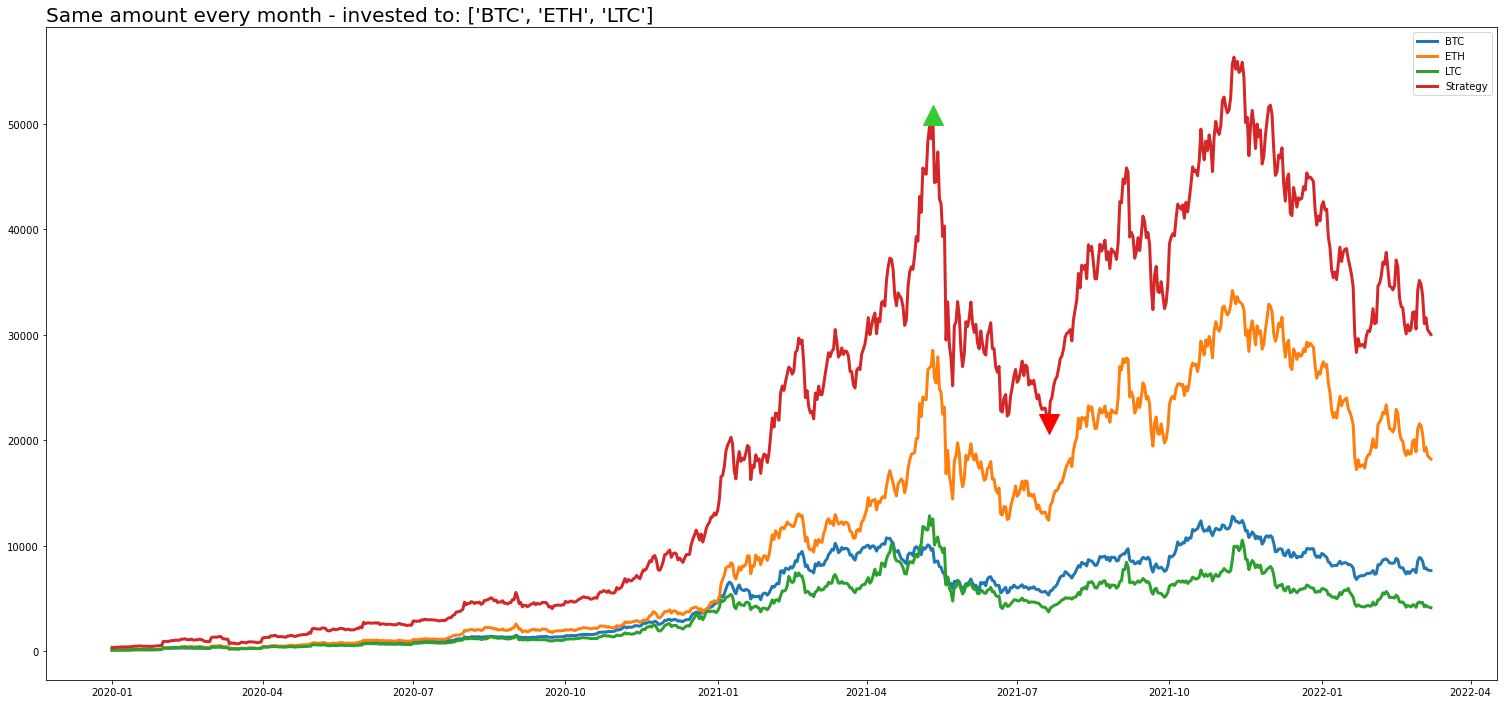

Invested: 10000 €
Value at the end: 30036 €
Return on Investment(ROI): 200.36 %
Maximum Drawdown: 57.67 %


In [5]:
#List of crypto currencies we want to verify
cur = ['BTC', 'ETH', 'LTC']

#empty list where we append strategy results for each currency
strategy = []
#we itterate through cur list and calculate the same thing as above, then we append results to the list
for currency in cur:
    df = yf.download(tickers=currency + '-USD')
    df = df[df.index.year >= int(investing_from[:4])]

    number_of_investment = 0

    for i in range(len(df)):
        if df.index.day[i] == day_of_investment:
            df[number_of_investment] = np.NaN #create new column with nan values
            #then on the day that we set, add how many coins we buy, we need to divide invested amount by number of coins we want to invest
            df[number_of_investment][i] = (invest / len(cur)) / df['Close'][i]

            number_of_investment += 1
    #Drop columns that we don't need
    df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close'])

    for col in list(df.columns[1:]):
        df[col] = df[col].ffill()
        df[col] = df[col] * df['Close']

    #Return on Investment is calculate as sum of all columns (except for Close)
    df['ROI'] = df.iloc[:, 1:].sum(axis = 1)
    
    strategy.append(df['ROI']) #append results for each coin to strategy list
    
#create new dataframe from strategy list of Pandas Series
str_df = pd.DataFrame(strategy)
str_df = str_df.T #Transpose dataframe to move dates on Y axis
str_df.columns = cur #rename columns, so coins names are now names of each column
str_df['Strategy'] = str_df.sum(axis = 1) #Then add new column where we calculate results for every coin

#Calculate Maximum Drawdown
valley = np.argmax(np.maximum.accumulate(str_df['Strategy']) - str_df['Strategy'])
peak = np.argmax(str_df['Strategy'][:valley])

plt.figure(figsize = (26, 12))
plt.plot(str_df, label = str_df.columns.tolist(), lw = 3)
#Show Peak of Max DD
plt.plot(str_df.index[peak], str_df['Strategy'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
#Show Bottom of Max DD
plt.plot(str_df.index[valley], str_df['Strategy'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')
plt.title('Same amount every month - invested to: ' + str(cur), loc = 'left', size = 20)
plt.legend()
plt.show()

print('Invested:', total_investment, '€')
print('Value at the end:', round(str_df['Strategy'][-1]), '€')
print('Return on Investment(ROI):', round((str_df['Strategy'][-1] - total_investment) / total_investment * 100, 2), '%')
print('Maximum Drawdown:', round(((str_df['Strategy'][peak] - str_df['Strategy'][valley]) / str_df['Strategy'][peak])*100, 2), '%')

#Assign results to variable so we can compare different approaches later
strategy3 = str_df['Strategy']

### Split investment between multiple Cryptocurrencies - All in on day 1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3767981932.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(str_df.index[peak], str_df['Strategy'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
/var/folders/8g/t4rchr994qb_y14tkj_j6dzm0000gn/T/ipykernel_19934/3767981932.py:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(str_df.index[valley], str_df['Strategy'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')


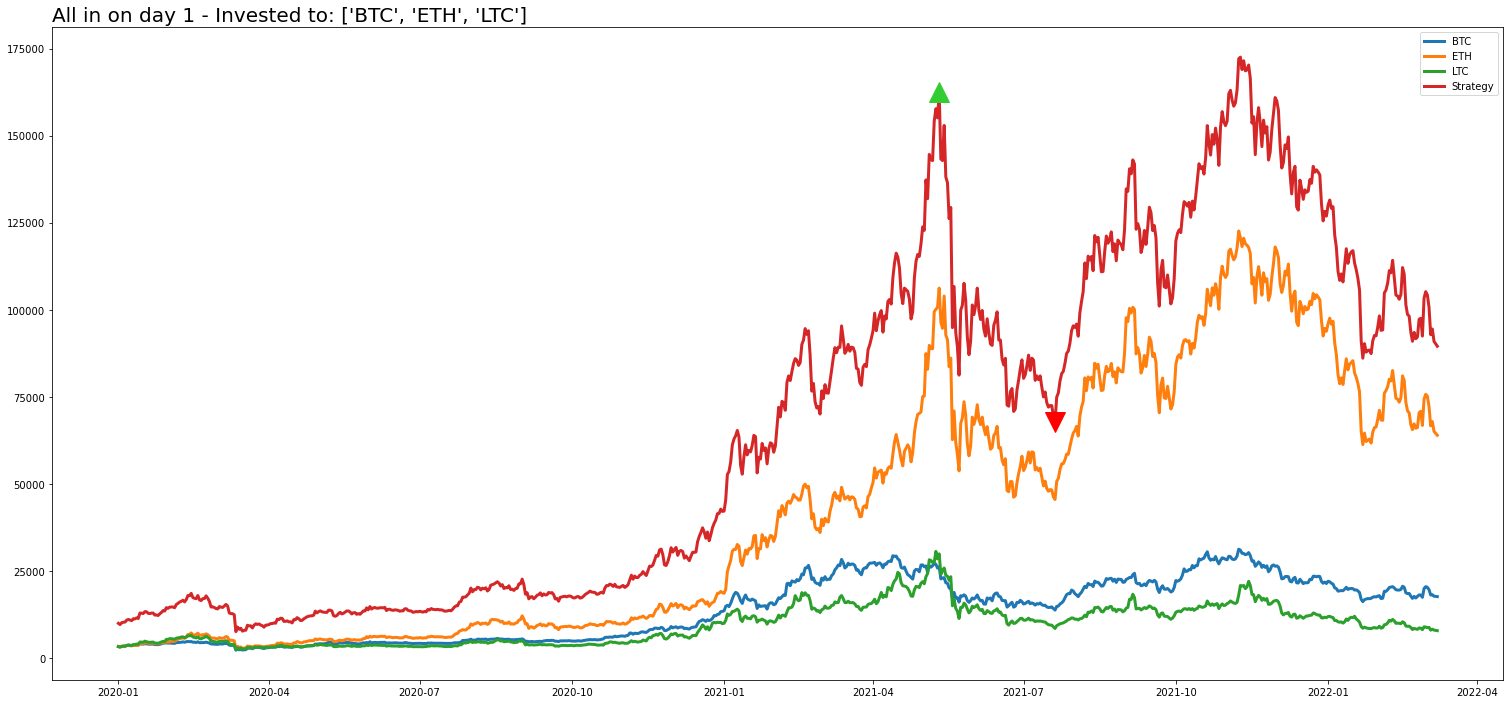

Invested: 10000 €
Value at the end: 89548 €
Return on Investment(ROI): 795.48 %
Maximum Drawdown: 58.21 %


In [6]:
cur = ['BTC', 'ETH', 'LTC']

strategy = []
for currency in cur:
    df = yf.download(tickers=currency + '-USD')
    df = df[df.index.year >= int(investing_from[:4])]

    df['ROI'] = (total_investment / len(cur)) / df['Close'][0]  #shows how many coins we can afford on day 1
    df['ROI'] = df['ROI'] * df['Close'] #Then for every row we multiply current Price with amount of coins we have
    
    strategy.append(df['ROI']) #append results for each coin to strategy list
    
#create new dataframe from strategy list of Pandas Series
str_df = pd.DataFrame(strategy)
str_df = str_df.T #Transpose dataframe to move dates on Y axis
str_df.columns = cur #rename columns, so coins names are now names of each column
str_df['Strategy'] = str_df.sum(axis = 1) #Then add new column where we calculate results for every coin

#Calculate Maximum Drawdown
valley = np.argmax(np.maximum.accumulate(str_df['Strategy']) - str_df['Strategy'])
peak = np.argmax(str_df['Strategy'][:valley])

plt.figure(figsize = (26, 12))
plt.plot(str_df, label = str_df.columns.tolist(), lw = 3)
#Show Peak of Max DD
plt.plot(str_df.index[peak], str_df['Strategy'][peak], 'o', color = 'limegreen', markersize = 20, marker = '^')
#Show Bottom of Max DD
plt.plot(str_df.index[valley], str_df['Strategy'][valley], 'o', color = 'Red', markersize = 20, marker = 'v')
plt.title('All in on day 1 - Invested to: ' + str(cur), loc = 'left', size = 20)
plt.legend()
plt.show()

print('Invested:', total_investment, '€')
print('Value at the end:', round(str_df['Strategy'][-1]), '€')
print('Return on Investment(ROI):', round((str_df['Strategy'][-1] - total_investment) / total_investment * 100, 2), '%')
print('Maximum Drawdown:', round(((str_df['Strategy'][peak] - str_df['Strategy'][valley]) / str_df['Strategy'][peak])*100, 2), '%')

#Assign results to variable so we can compare different approaches later
strategy4 = str_df['Strategy']

### Compare all approaches

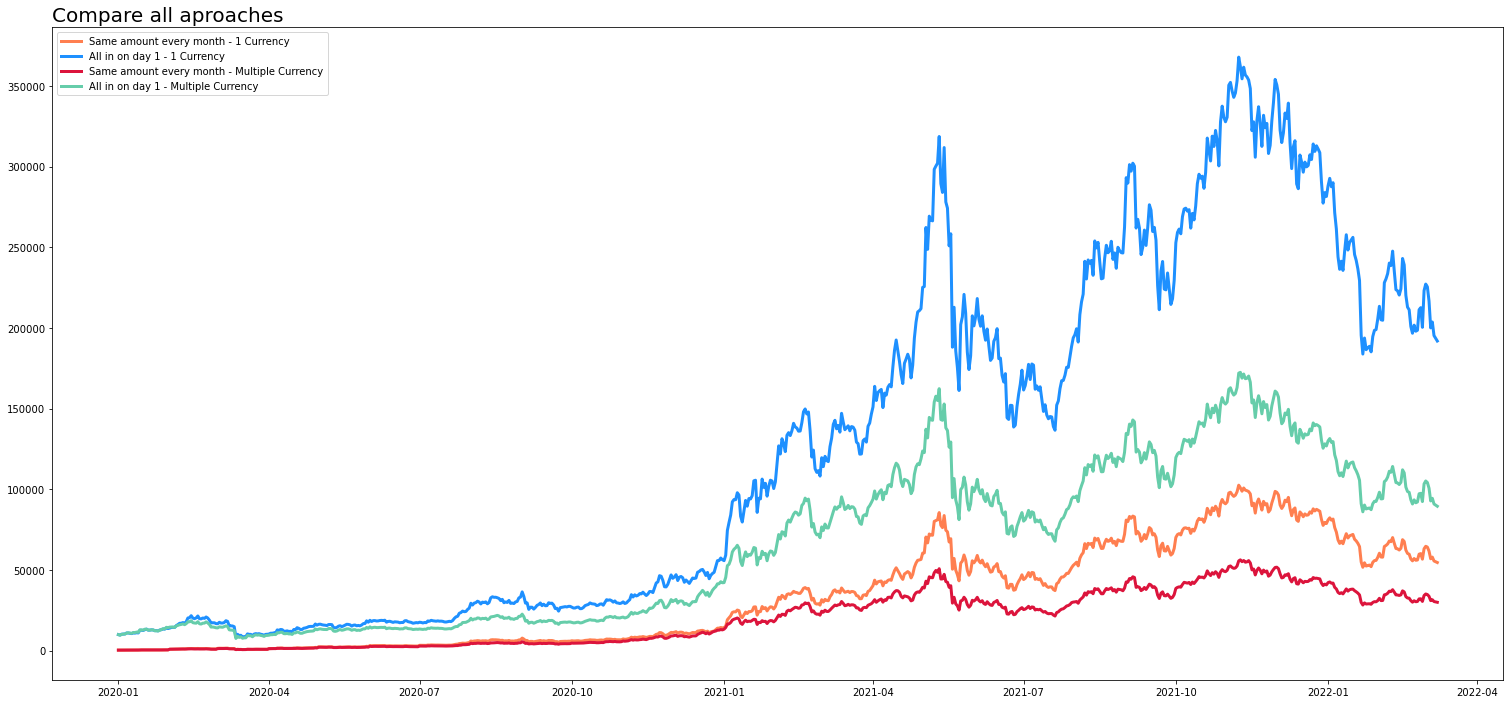

In [7]:
plt.figure(figsize = (26, 12))
plt.plot(strategy1, label = 'Same amount every month - 1 Currency', color = 'coral', lw = 3)
plt.plot(strategy2, label = 'All in on day 1 - 1 Currency', color = 'dodgerblue', lw = 3)
plt.plot(strategy3, label = 'Same amount every month - Multiple Currency', color = 'crimson', lw = 3)
plt.plot(strategy4, label = 'All in on day 1 - Multiple Currency', color = 'mediumaquamarine', lw = 3)
plt.title('Compare all aproaches', loc = 'left', size = 20)
plt.legend()
plt.show()